In [68]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [81]:
dataset = sklearn.datasets.fetch_olivetti_faces(data_home="/home/talvani/TP-RNA/olivetti",shuffle=True)
print(dataset.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


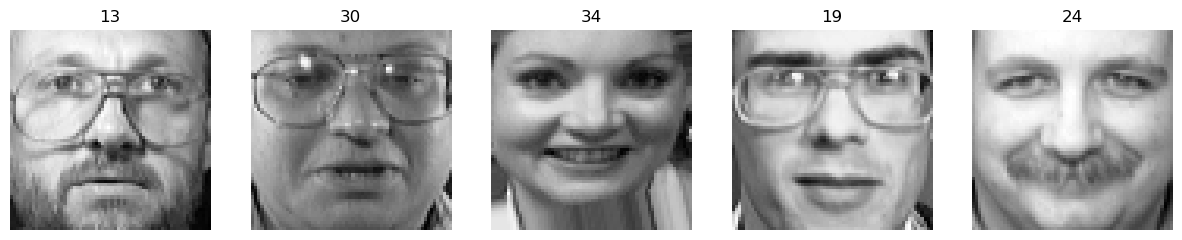

In [66]:
images = dataset.images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(dataset.target[i]))

In [82]:
x= dataset.images
y= dataset.target

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=88)  # 0.25 * 0.8 = 0.2

In [83]:
np.shape(x_train)
np.shape(x_test)
print(np.shape(x_train),np.shape(x_test),np.shape(X_val))

(240, 64, 64) (80, 64, 64) (80, 64, 64)


In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(40)
])

/home/talvani/miniconda3/envs/Talvani/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.fit(x_train, y_train, epochs=150)


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0308 - loss: 4.1591
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0329 - loss: 3.6851   
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0353 - loss: 3.6759
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0320 - loss: 3.6876
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0420 - loss: 3.6871
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0221 - loss: 3.6873  
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0325 - loss: 3.6865
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0438 - loss: 3.6858
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0464 - loss: 3.6860
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0359 - loss: 3.6856  
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0234 - loss: 3.6863   
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0183 - l

In [96]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


3/3 - 0s - 74ms/step - accuracy: 0.6250 - loss: 1.6585

Test accuracy: 0.625
